In [163]:
#Importación de librerías
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

#Configuraciones
pd.options.display.float_format = '{:.4f}'.format

In [111]:

#Lectura y visualización de matriz de datos
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\TP AEM - database.xlsx"
df = pd.read_excel(path).sort_values(by='Country Name')
df

,Country Name,Country Code,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
18,Argentina,ARG,42.5908,14.9117,0.8813,1.0457,5.3186,7.3309,8.0090
25,Australia,AUS,47.1238,3.9746,2.1059,0.6622,2.1131,2.5583,13.8760
12,Austria,AUT,32.1281,16.0631,1.5208,1.8149,1.0524,3.6561,41.4850
22,Belgium,BEL,44.7960,28.3120,1.2331,1.0485,0.6700,0.9196,1.9590
1,Canada,CAN,6.4344,4.3107,3.6934,0.8181,1.6971,1.5105,18.5180
5,Chile,CHL,15.2390,1.7577,6.9273,0.7305,3.9878,9.0692,12.3570
17,Colombia,COL,39.9766,1.9040,4.0533,0.8649,6.4107,16.1112,18.8960
13,Costa Rica,CRI,34.7826,4.7591,1.8074,1.0280,4.2021,15.3081,19.9240
24,Czechia,CZE,45.6400,32.1800,1.3095,1.0655,1.8608,2.6638,26.0790
36,Denmark,DNK,65.6491,59.8983,2.5385,2.4779,1.2663,2.2230,12.0060


In [112]:
ndf = df.iloc[:,1:].set_index('Country Code') #ndf: numereric data frame

In [113]:
#Breve información de la matriz de datos (cantidad de observaciones, tipo de formatos, etc.)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, ARG to USA
Data columns (total 7 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Agricultural land (% of land area)                                        39 non-null     float64
 1   Arable land (% of land area)                                              39 non-null     float64
 2   Agricultural raw materials exports (% of merchandise exports)             39 non-null     float64
 3   Agricultural raw materials imports (% of merchandise imports)             39 non-null     float64
 4   Agriculture, forestry, and fishing, value added (% of GDP)                39 non-null     float64
 5   Employment in agriculture (% of total employment) (modeled ILO estimate)  39 non-null     float64
 6   Rural population (% of total population)                               

In [114]:
#Estadísticas descriptivas (para todos los países). Obs: Siempre se considerarán medidas muestrales. 
desc = ndf.describe()
cv = pd.DataFrame(ndf.std() / ndf.mean()).T
cv.index = ['cv']
kurt = pd.DataFrame(ndf.kurt()).T
kurt.index = ['kurt']
skew = pd.DataFrame(ndf.skew()).T
skew.index = ['skew']
desc = pd.concat([desc, cv, kurt, skew], axis=0).reset_index()
desc = desc.rename(columns = {'index': 'Medida'}) #Ver si corresponde nombre 'Estadístico'
desc

,Medida,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
0,count,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000
1,mean,38.3466,18.2686,2.4064,1.3690,2.4099,5.0710,21.2514
2,std,17.3003,13.6352,2.8458,0.6346,1.6200,4.3974,11.2517
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.9538,6.9086,0.7088,0.9026,1.3024,2.1510,12.8710
5,50%,43.1253,16.1404,1.3095,1.1496,1.9073,3.7783,19.2910
6,75%,48.3528,26.7491,2.6729,1.7546,3.3223,6.1308,28.8100
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4512,0.7464,1.1826,0.4635,0.6722,0.8672,0.5295
9,kurt,-0.3435,0.8862,4.3522,0.1051,0.4283,1.9449,-0.3566


In [115]:
#Estadísticas descriptivas (sin incluir Argentina)
ndf_oecd = ndf.drop('ARG')
desc_oecd = ndf_oecd.describe()
cv_oecd = pd.DataFrame(ndf_oecd.std() / ndf_oecd.mean()).T
cv_oecd.index = ['cv']
kurt_oecd = pd.DataFrame(ndf_oecd.kurt()).T
kurt_oecd.index = ['kurt']
skew_oecd = pd.DataFrame(ndf_oecd.skew()).T
skew_oecd.index = ['skew']
desc_oecd = pd.concat([desc_oecd, cv_oecd, kurt_oecd, skew_oecd], axis=0).reset_index()
desc_oecd = desc_oecd.rename(columns = {'index': 'Medida'}) #Ver si corresponde nombre 'Estadístico'

#Para Argentina
ndf_arg = ndf.loc[['ARG']].reset_index()

display(desc_oecd, ndf_arg)

# """Ver si ARG no se encuentra muy fuera del promedio de la OCDE"""

,Medida,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
0,count,38.0000,38.0000,38.0000,38.0000,38.0000,38.0000,38.0000
1,mean,38.2349,18.3569,2.4465,1.3775,2.3334,5.0116,21.5999
2,std,17.5183,13.8070,2.8728,0.6408,1.5686,4.4405,11.1874
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.7273,6.6695,0.6938,0.8884,1.2844,2.1149,13.5078
5,50%,43.7443,16.3399,1.3380,1.1531,1.8841,3.7172,19.3630
6,75%,48.6791,27.4033,2.7402,1.7839,3.2592,5.7397,29.0370
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4582,0.7521,1.1742,0.4652,0.6723,0.8860,0.5179
9,kurt,-0.4182,0.7749,4.1573,0.0087,0.9200,1.9896,-0.3474


,Country Code,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
0,ARG,42.5908,14.9117,0.8813,1.0457,5.3186,7.3309,8.0090


In [116]:
#Cálculo de matriz de varianzas y covarianzas (incluye todos los registros)
mcov = ndf.cov()
mcov

,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
Agricultural land (% of land area),299.2999,143.1640,-15.1587,-0.2389,-1.6690,5.1291,28.7369
Arable land (% of land area),143.1640,185.9197,-9.1130,3.2334,-5.5738,-11.6462,21.6284
Agricultural raw materials exports (% of merchandise exports),-15.1587,-9.1130,8.0986,0.5600,1.6387,1.1587,-1.0304
Agricultural raw materials imports (% of merchandise imports),-0.2389,3.2334,0.5600,0.4027,0.0430,0.1770,2.0701
"Agriculture, forestry, and fishing, value added (% of GDP)",-1.6690,-5.5738,1.6387,0.0430,2.6243,5.7188,-0.8835
Employment in agriculture (% of total employment) (modeled ILO estimate),5.1291,-11.6462,1.1587,0.1770,5.7188,19.3369,7.1725
Rural population (% of total population),28.7369,21.6284,-1.0304,2.0701,-0.8835,7.1725,126.6001


In [117]:
#Cálculo de matriz de correlaciones (incluye todos los registros)
mcor = ndf.corr()
mcor

,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
Agricultural land (% of land area),1.0000,0.6069,-0.3079,-0.0218,-0.0596,0.0674,0.1476
Arable land (% of land area),0.6069,1.0000,-0.2349,0.3737,-0.2523,-0.1942,0.1410
Agricultural raw materials exports (% of merchandise exports),-0.3079,-0.2349,1.0000,0.3101,0.3555,0.0926,-0.0322
Agricultural raw materials imports (% of merchandise imports),-0.0218,0.3737,0.3101,1.0000,0.0419,0.0634,0.2899
"Agriculture, forestry, and fishing, value added (% of GDP)",-0.0596,-0.2523,0.3555,0.0419,1.0000,0.8028,-0.0485
Employment in agriculture (% of total employment) (modeled ILO estimate),0.0674,-0.1942,0.0926,0.0634,0.8028,1.0000,0.1450
Rural population (% of total population),0.1476,0.1410,-0.0322,0.2899,-0.0485,0.1450,1.0000


In [118]:
#Medidas de variazión conjunta y medidas de correlación conjunta
varianza_total = np.trace(mcov)
varianza_media = varianza_total / len(ndf.columns)
varianza_generalizada = np.linalg.det(mcov)
varianza_efectiva = varianza_generalizada**(1/len(ndf.columns))

dependencia_conjunta = np.linalg.det(mcor)
dependencia_efectiva = dependencia_conjunta**(1/(len(ndf.columns)-1))

medidas_globales = pd.DataFrame([[varianza_total, varianza_media, varianza_generalizada, varianza_efectiva, dependencia_conjunta, dependencia_efectiva]],
                                columns=['varianza_total', 'varianza_media', 'varianza_generalizada', 'varianza_efectiva', 'dependencia_conjunta', 'dependencia_efectiva'])
medidas_globales

,varianza_total,varianza_media,varianza_generalizada,varianza_efectiva,dependencia_conjunta,dependencia_efectiva
0,642.2821,91.7546,77537504.1862,13.3990,0.0665,0.6365


In [119]:
"""
Análisis de Componentes Principales - Matriz de Covarianzas

"""

pca_cov = PCA()
componentes_cov = pca_cov.fit_transform(ndf)

varianza_cov = pca_cov.explained_variance_
std_componentes_cov = np.sqrt(pca_cov.explained_variance_) #Ver si eliminamos
varianza_explicada_cov = pca_cov.explained_variance_ratio_
varianza_explicada_acum_cov = np.cumsum(pca_cov.explained_variance_ratio_)
coeficientes_cov =  pca_cov.components_.T

#Generamos una tabla resumen
data_var_cov = {
    'Varianza (eigenvalues)': varianza_cov,
    'Desviación Estándar': std_componentes_cov,
    'Varianza Explicada': varianza_explicada_cov,
    'Varianza Explicada Acumulada': varianza_explicada_acum_cov
}

variablespca_cov = pd.DataFrame(data_var_cov, index=[f'Componente {i+1}' for i in range(len(varianza_cov))]).reset_index()
variablespca_cov



,index,Varianza (eigenvalues),Desviación Estándar,Varianza Explicada,Varianza Explicada Acumulada
0,Componente 1,402.1466,20.0536,0.6261,0.6261
1,Componente 2,122.5019,11.0681,0.1907,0.8169
2,Componente 3,91.1414,9.5468,0.1419,0.9588
3,Componente 4,18.4013,4.2897,0.0286,0.9874
4,Componente 5,7.2756,2.6973,0.0113,0.9987
5,Componente 6,0.6005,0.7749,0.0009,0.9997
6,Componente 7,0.2148,0.4635,0.0003,1.0000


In [120]:
coeficientespca_cov = pd.DataFrame(coeficientes_cov, columns=[f'Coeficiente (eigenvector) {i+1}' for i in range(coeficientes_cov.shape[1])], index=ndf.columns).reset_index()
coeficientespca_cov


,index,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land (% of land area),0.8187,-0.1213,-0.5521,-0.0820,0.0568,-0.0018,0.0134
1,Arable land (% of land area),0.5575,-0.0498,0.8125,0.1600,-0.0063,0.0045,-0.0311
2,Agricultural raw materials exports (% of merch...,-0.0448,0.0119,0.0085,0.1400,0.9733,-0.1460,-0.0976
3,Agricultural raw materials imports (% of merch...,0.0046,0.0158,0.0297,0.0361,0.0723,-0.1409,0.9861
4,"Agriculture, forestry, and fishing, value adde...",-0.0117,0.0002,-0.0518,0.3047,0.1084,0.9376,0.1164
5,Employment in agriculture (% of total employme...,-0.0039,0.0685,-0.1766,0.9216,-0.1799,-0.2815,-0.0565
6,Rural population (% of total population),0.1293,0.9888,-0.0152,-0.0682,0.0062,0.0234,-0.0106


In [121]:
componentespca_cov = pd.DataFrame(componentes_cov, columns=[f'Componente {i+1} ' for i in range(componentes_cov.shape[1])], index=df.iloc[:,0]).reset_index()
componentespca_cov

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,-0.0846,-13.3099,-5.4421,2.7610,-1.4191,2.0268,0.3427
1,Australia,-1.7125,-7.8332,-15.9116,-4.9780,0.6197,0.3196,0.0796
2,Austria,-3.6418,20.7706,1.6602,-3.0475,-0.9359,-0.3337,0.2181
3,Belgium,8.4727,-20.6625,5.6962,-2.1385,-0.4236,-0.6640,-0.1900
4,Canada,-34.3002,1.6272,6.9804,-2.7682,0.0333,0.1560,-0.5140
5,Chile,-29.5127,-4.8508,-1.2903,4.6346,2.5412,-0.4551,-0.8141
6,Colombia,-8.2587,-0.9436,-16.3184,9.0139,0.1951,0.3427,-0.2610
7,Costa Rica,-10.6563,0.4815,-10.9047,8.1051,-2.3809,-1.1507,-0.2619
8,Czechia,14.4143,3.0130,7.6379,-1.2515,-0.3592,0.5274,-0.5062
9,Denmark,44.3896,-14.7035,19.4860,2.1380,1.8289,-0.5256,0.2783


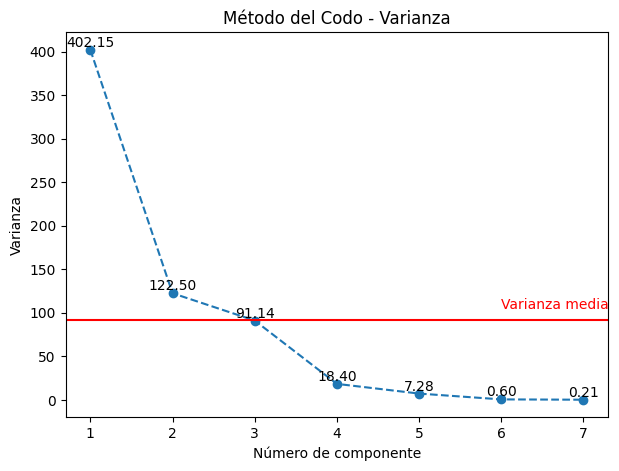

In [122]:
#Elección de Componentes Principales
#1. Método del Codo - Varianza

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_cov) + 1), varianza_cov, marker='o', linestyle='--')
ax.axhline(y=varianza_total/ndf.shape[1], color='red', linestyle='-', linewidth=1.5)
ax.text(len(varianza_cov)-1, varianza_total/ndf.shape[1]*1.1, 'Varianza media', color='red', ha='left', va='bottom')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza')
for i, v in enumerate(varianza_cov):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

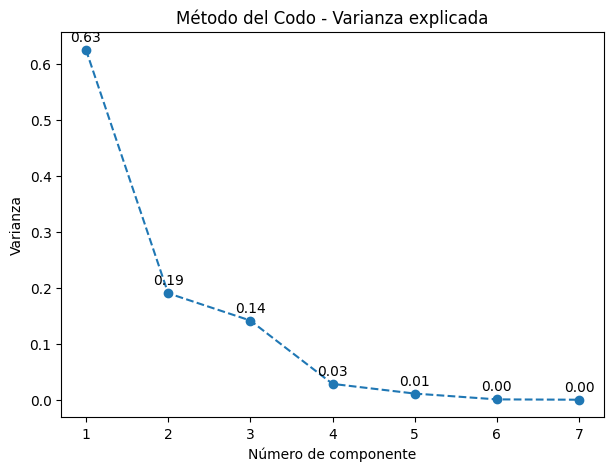

In [123]:
#2. Método del Codo - Varianza explicada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_cov) + 1), varianza_explicada_cov, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada')
for i, v in enumerate(varianza_explicada_cov):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

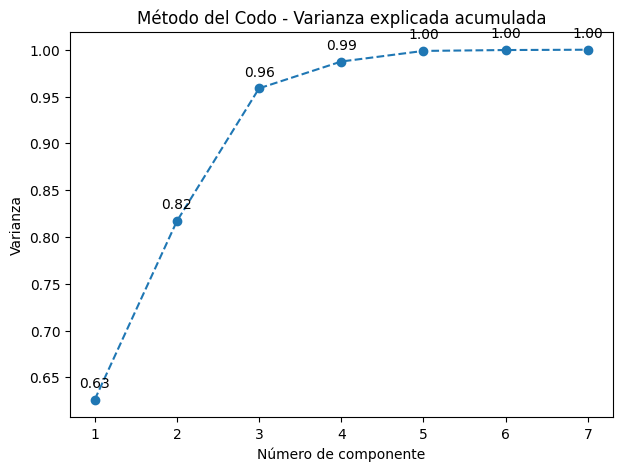

In [124]:
#3. Método del Codo - Varianza explicada acumulada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_acum_cov) + 1), varianza_explicada_acum_cov, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada acumulada')
for i, v in enumerate(varianza_explicada_acum_cov):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [125]:
"""
Análisis de Componentes Principales - Matriz de Correlaciones
"""

scaler = StandardScaler()
ndf_scaled = scaler.fit_transform(ndf)

pca_cor = PCA()
componentes_cor = pca_cor.fit_transform(ndf_scaled)

varianza_cor = pca_cor.explained_variance_
std_componentes_cor = np.sqrt(pca_cor.explained_variance_) #Ver si eliminamos
varianza_explicada_cor = pca_cor.explained_variance_ratio_
varianza_explicada_acum_cor = np.cumsum(pca_cor.explained_variance_ratio_)
coeficientes_cor =  pca_cor.components_.T

#Generamos una tabla resumen
data_var_cor = {
    'Varianza (eigenvalues)': varianza_cor,
    'Desviación Estándar': std_componentes_cor,
    'Varianza Explicada': varianza_explicada_cor,
    'Varianza Explicada Acumulada': varianza_explicada_acum_cor
}

variablespca_cor = pd.DataFrame(data_var_cor, index=[f'Componente {i+1}' for i in range(len(varianza_cor))]).reset_index()
variablespca_cor



,index,Varianza (eigenvalues),Desviación Estándar,Varianza Explicada,Varianza Explicada Acumulada
0,Componente 1,2.2307,1.4936,0.3105,0.3105
1,Componente 2,1.7614,1.3272,0.2452,0.5557
2,Componente 3,1.3689,1.1700,0.1905,0.7462
3,Componente 4,0.9196,0.9590,0.1280,0.8742
4,Componente 5,0.5438,0.7374,0.0757,0.9499
5,Componente 6,0.2321,0.4818,0.0323,0.9822
6,Componente 7,0.1278,0.3574,0.0178,1.0000


In [126]:
coeficientespca_cor = pd.DataFrame(coeficientes_cor, columns=[f'Coeficiente (eigenvector) {i+1}' for i in range(coeficientes_cor.shape[1])], index=ndf.columns).reset_index()
coeficientespca_cor


,index,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land (% of land area),-0.3549,0.4082,-0.4055,-0.2242,0.4675,-0.5048,-0.1388
1,Arable land (% of land area),-0.4678,0.4219,0.0334,-0.3519,-0.0973,0.6512,0.2114
2,Agricultural raw materials exports (% of merch...,0.3852,0.0762,0.5127,-0.3129,0.6452,0.0444,0.2585
3,Agricultural raw materials imports (% of merch...,-0.0173,0.4622,0.5868,-0.1190,-0.4701,-0.4205,-0.1727
4,"Agriculture, forestry, and fishing, value adde...",0.5456,0.3133,-0.2479,-0.1807,-0.0170,0.3103,-0.6431
5,Employment in agriculture (% of total employme...,0.4495,0.4094,-0.3699,0.0904,-0.2299,-0.1188,0.6468
6,Rural population (% of total population),-0.0827,0.4125,0.1703,0.8204,0.2855,0.1787,-0.0866


In [127]:
componentespca_cor = pd.DataFrame(componentes_cor, columns=[f'Componente {i+1} ' for i in range(componentes_cor.shape[1])], index=df.iloc[:,0]).reset_index()
componentespca_cor

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,1.1533,0.0074,-1.5369,-0.9964,-0.4582,0.1945,-0.8682
1,Australia,-0.0139,-1.3371,-0.8139,-0.1373,0.7517,-0.5888,-0.3262
2,Austria,-0.6881,0.4394,1.0396,1.7717,-0.0828,-0.1353,-0.0112
3,Belgium,-1.5151,-1.2485,-0.3149,-1.4706,-0.1826,-0.0425,0.3173
4,Canada,0.7485,-2.1489,0.8140,0.5498,0.0622,0.5732,0.0880
5,Chile,2.7102,-1.0625,0.0129,-0.3990,0.5472,0.4379,0.5512
6,Colombia,3.3005,0.9364,-1.8483,-0.0772,0.2317,-0.0393,0.0747
7,Costa Rica,2.1523,0.4909,-1.5483,0.4443,-0.4769,-0.2826,0.6707
8,Czechia,-1.2497,0.2013,-0.2588,0.0888,0.3323,0.6809,-0.0336
9,Denmark,-2.6431,1.9432,0.7961,-2.2854,-0.4299,0.1722,0.2460


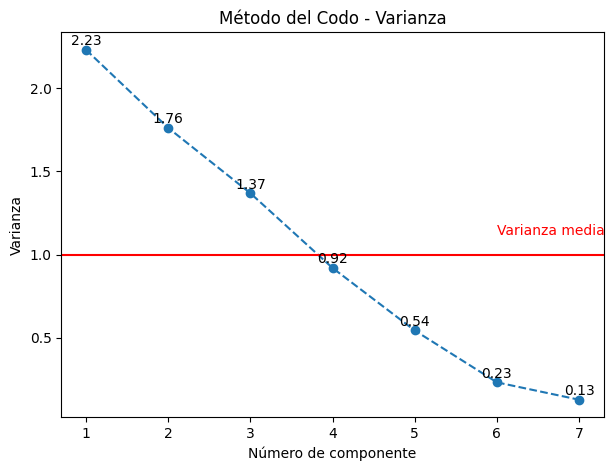

In [128]:
#Elección de Componentes Principales
#1. Método del Codo - Varianza

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_cor) + 1), varianza_cor, marker='o', linestyle='--')
ax.axhline(y=np.trace(mcor)/ndf.shape[1], color='red', linestyle='-', linewidth=1.5)
ax.text(len(varianza_cor)-1, np.trace(mcor)/ndf.shape[1]*1.1, 'Varianza media', color='red', ha='left', va='bottom')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza')
for i, v in enumerate(varianza_cor):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

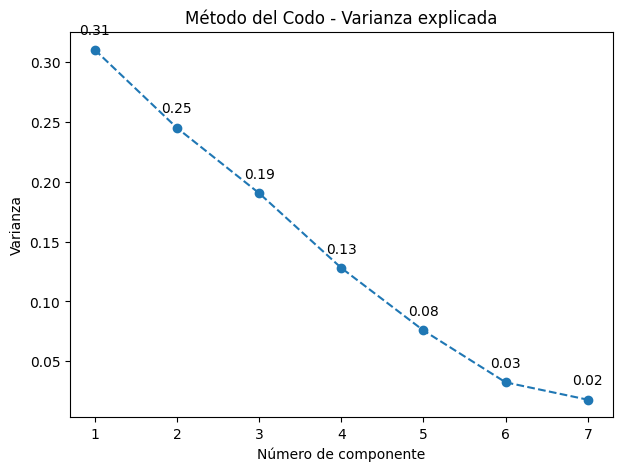

In [129]:
#2. Método del Codo - Varianza explicada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_cor) + 1), varianza_explicada_cor, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada')
for i, v in enumerate(varianza_explicada_cor):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

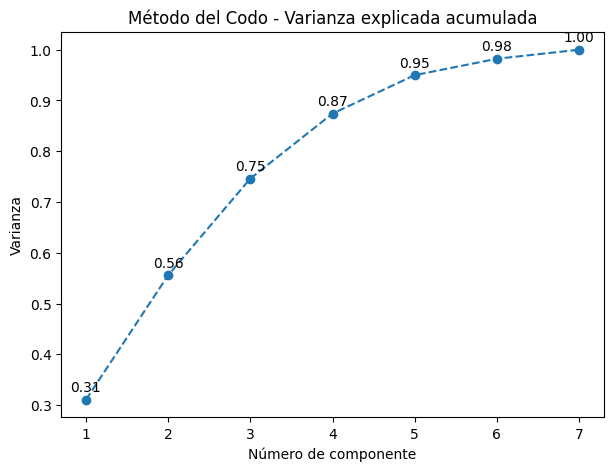

In [130]:
#3. Método del Codo - Varianza explicada acumulada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_acum_cor) + 1), varianza_explicada_acum_cor, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada acumulada')
for i, v in enumerate(varianza_explicada_acum_cor):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [158]:
#Selección de componentes
componentes = componentespca_cor.iloc[:,0:3]
componentes

,Country Name,Componente 1,Componente 2
0,Argentina,1.1533,0.0074
1,Australia,-0.0139,-1.3371
2,Austria,-0.6881,0.4394
3,Belgium,-1.5151,-1.2485
4,Canada,0.7485,-2.1489
5,Chile,2.7102,-1.0625
6,Colombia,3.3005,0.9364
7,Costa Rica,2.1523,0.4909
8,Czechia,-1.2497,0.2013
9,Denmark,-2.6431,1.9432


In [159]:
#Correlación entre primeros 2 componentes y variables de matriz de datos
cor_pca_variables = pd.concat([df.iloc[:, 2:], componentes.iloc[:,1:]], axis=1).corr().iloc[:-2, -2:]
cor_pca_variables

,Componente 1,Componente 2
Agricultural land (% of land area),-0.1943,0.1494
Arable land (% of land area),0.0094,0.2030
Agricultural raw materials exports (% of merchandise exports),0.2049,-0.2635
Agricultural raw materials imports (% of merchandise imports),0.1207,0.1114
"Agriculture, forestry, and fishing, value added (% of GDP)",0.0608,-0.0640
Employment in agriculture (% of total employment) (modeled ILO estimate),-0.0881,0.1079
Rural population (% of total population),-0.2497,0.0674


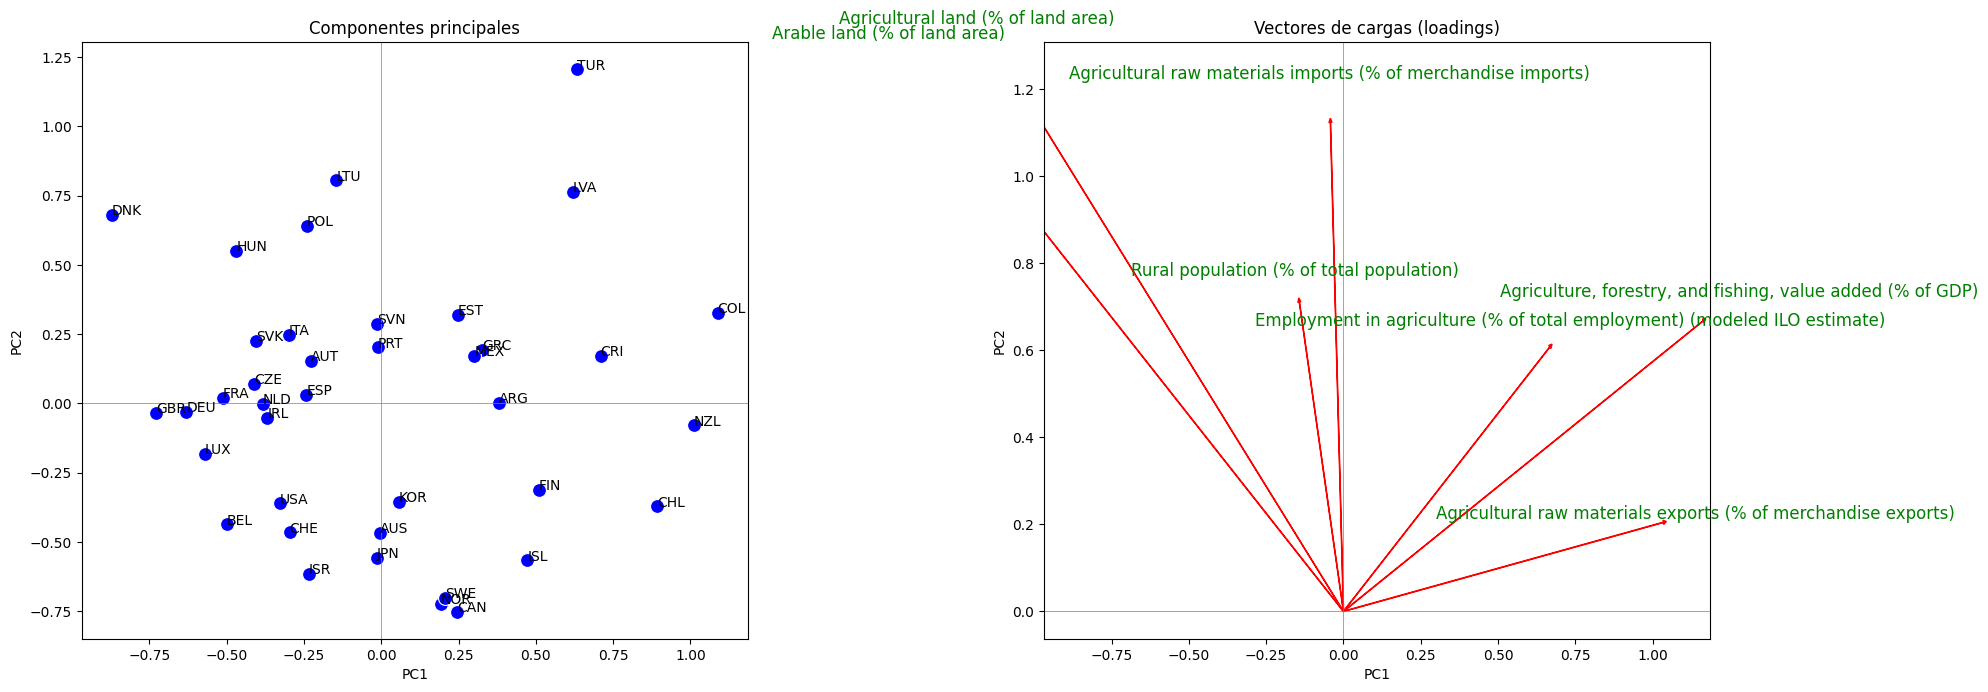

In [178]:
#Datos para gráfico Biplot. Se trbajará con c = 0.5

ndf_scaled_promedio = np.mean(ndf_scaled, axis=0) #Dado que utilizaremos resultados de matriz de correlaciones, se trabaja sobre matriz de datos estandarizada
ndf_scaled_centrada = ndf_scaled - ndf_scaled_promedio

ndf_scaled_centrada_producto = np.dot(np.transpose(ndf_scaled_centrada), ndf_scaled_centrada)
autovalores, autovectores = np.linalg.eig(ndf_scaled_centrada_producto)

ndf_scaled_centrada_producto_autovalores = pd.DataFrame(np.diag(autovalores))
D = pd.DataFrame(np.diag(autovalores))
D_raiz_neg = pd.DataFrame(np.where(D != 0, np.power(D, -1/2),0))
D_cuarta = pd.DataFrame(np.where(D != 0, np.power(D, 1/4),0))

componentes_biplot = np.dot(componentespca_cor.iloc[:,1:], D_raiz_neg)
componentes_biplot = pd.DataFrame(np.dot(componentes_biplot, D_cuarta))

coeficientes_biplot = pd.DataFrame(np.dot(D_cuarta, coeficientespca_cor.iloc[:,1:]))

#Gráfico Biplot

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Primer gráfico: scatterplot de las componentes principales
sns.scatterplot(x=componentes_biplot.iloc[:, 0], y=componentes_biplot.iloc[:, 1], ax=axes[0], s=100, color='blue')
axes[0].axhline(0, color='gray', lw=0.5)
axes[0].axvline(0, color='gray', lw=0.5)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Componentes principales')

for i, txt in enumerate(df.iloc[:, 1]):
    axes[0].annotate(txt, (componentes_biplot.iloc[i, 0], componentes_biplot.iloc[i, 1]))

# Obtener los límites del eje x del primer gráfico
xlim = axes[0].get_xlim()

# Segundo gráfico: vectores de los coeficientes (cargas)
for i in range(coeficientes_biplot.shape[0]):
    axes[1].arrow(0, 0, coeficientes_biplot.iloc[i, 0], coeficientes_biplot.iloc[i, 1],
                  color='red', head_width=0.01, head_length=0.01)
    axes[1].text(coeficientes_biplot.iloc[i, 0]*1.1, coeficientes_biplot.iloc[i, 1]*1.1,
                 ndf.columns[i], color='green', ha='center', va='center', fontsize=12)

axes[1].axhline(0, color='gray', lw=0.5)
axes[1].axvline(0, color='gray', lw=0.5)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Vectores de cargas (loadings)')

# Establecer los mismos límites del eje x en el segundo gráfico
axes[1].set_xlim(xlim)

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

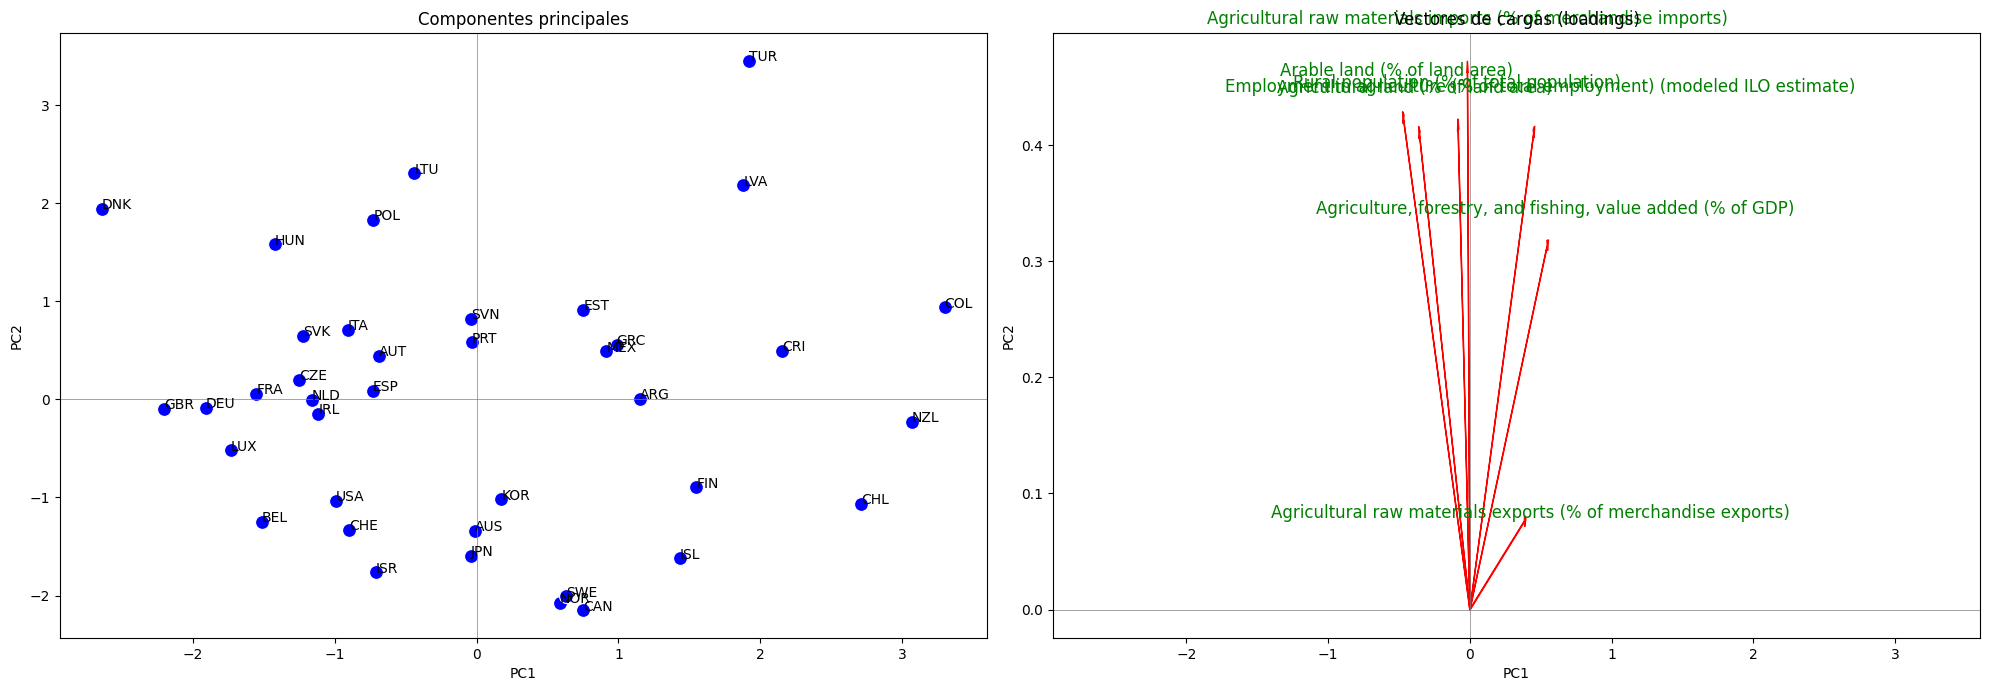

In [174]:
#Gráfico Biplot. Con c = 0

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Primer gráfico: scatterplot de las componentes principales
sns.scatterplot(x=componentespca_cor.iloc[:, 1], y=componentespca_cor.iloc[:, 2], ax=axes[0], s=100, color='blue')
for i, txt in enumerate(df.iloc[:, 1]):
    axes[0].annotate(txt, (componentespca_cor.iloc[i, 1], componentespca_cor.iloc[i, 2]))
axes[0].axhline(0, color='gray', lw=0.5)
axes[0].axvline(0, color='gray', lw=0.5)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Componentes principales')

# Obtener los límites del eje x del primer gráfico
xlim = axes[0].get_xlim()

# Segundo gráfico: vectores de los coeficientes (cargas)
for i in range(coeficientespca_cor.shape[0]):
    axes[1].arrow(0, 0, coeficientespca_cor.iloc[i, 1], coeficientespca_cor.iloc[i, 2],
                  color='red', head_width=0.01, head_length=0.01)
    axes[1].text(coeficientespca_cor.iloc[i, 1]*1.1, coeficientespca_cor.iloc[i, 2]*1.1,
                 ndf.columns[i], color='green', ha='center', va='center', fontsize=12)

axes[1].axhline(0, color='gray', lw=0.5)
axes[1].axvline(0, color='gray', lw=0.5)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Vectores de cargas (loadings)')

# Establecer los mismos límites del eje x en el segundo gráfico
axes[1].set_xlim(xlim)

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

In [169]:
coeficientespca_cor

,index,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land (% of land area),-0.3549,0.4082,-0.4055,-0.2242,0.4675,-0.5048,-0.1388
1,Arable land (% of land area),-0.4678,0.4219,0.0334,-0.3519,-0.0973,0.6512,0.2114
2,Agricultural raw materials exports (% of merch...,0.3852,0.0762,0.5127,-0.3129,0.6452,0.0444,0.2585
3,Agricultural raw materials imports (% of merch...,-0.0173,0.4622,0.5868,-0.1190,-0.4701,-0.4205,-0.1727
4,"Agriculture, forestry, and fishing, value adde...",0.5456,0.3133,-0.2479,-0.1807,-0.0170,0.3103,-0.6431
5,Employment in agriculture (% of total employme...,0.4495,0.4094,-0.3699,0.0904,-0.2299,-0.1188,0.6468
6,Rural population (% of total population),-0.0827,0.4125,0.1703,0.8204,0.2855,0.1787,-0.0866


In [170]:
componentespca_cor

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,1.1533,0.0074,-1.5369,-0.9964,-0.4582,0.1945,-0.8682
1,Australia,-0.0139,-1.3371,-0.8139,-0.1373,0.7517,-0.5888,-0.3262
2,Austria,-0.6881,0.4394,1.0396,1.7717,-0.0828,-0.1353,-0.0112
3,Belgium,-1.5151,-1.2485,-0.3149,-1.4706,-0.1826,-0.0425,0.3173
4,Canada,0.7485,-2.1489,0.8140,0.5498,0.0622,0.5732,0.0880
5,Chile,2.7102,-1.0625,0.0129,-0.3990,0.5472,0.4379,0.5512
6,Colombia,3.3005,0.9364,-1.8483,-0.0772,0.2317,-0.0393,0.0747
7,Costa Rica,2.1523,0.4909,-1.5483,0.4443,-0.4769,-0.2826,0.6707
8,Czechia,-1.2497,0.2013,-0.2588,0.0888,0.3323,0.6809,-0.0336
9,Denmark,-2.6431,1.9432,0.7961,-2.2854,-0.4299,0.1722,0.2460
